# 残存歯認識モデル

In [11]:
# 画像データのパス設定
import pathlib
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array

import numpy as np
import tensorflow as tf


# ラベル（フォルダ名）の取得
dirname = [i.name for i in pathlib.Path('./tmp_img').glob('[0,1]*/')]


# データの分割
train_, test_label = train_test_split(dirname[:100])


# 訓練用
# 通常画像とセグメント用画像で分かれている
# 今回は通常画像のみを使う
# カメラ位置ごとに変数にしておく
def get_img_array(label, suffix):
    p = [pathlib.Path('./tmp_img/'+str(i)+'/'+str(i)+'-'+suffix+'.png') for i in dirname]
    arr = np.array([img_to_array(load_img(i)) for i in p])
    arr = arr.astype('float32')
    return arr/255.0


train_front = get_img_array(train_label, 'Front')
test_front = get_img_array(test_label, 'Front')

train_left = get_img_array(train_label, 'Left')
test_left = get_img_array(test_label, 'Left')

train_right = get_img_array(train_label, 'Right')
test_right= get_img_array(test_label, 'Right')

train_up = get_img_array(train_label, 'Up_Occ')
test_up = get_img_array(test_label, 'Up_Occ')

train_low = get_img_array(train_label, 'Low_Occ')
test_low = get_img_array(test_label, 'Low_Occ')

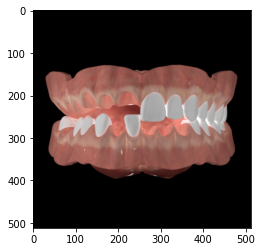

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_front[0])

# arrayの中身が0-255なら
# plt.imshow(train_front[0].astype('uint8'))  

In [12]:
def get_all_images(path):
    
    

def convert_dirname_to_array(dirname):
    np.asarray([int(i) for i in dirname]).astype('uint8')

array('0000000000000001110101100110', dtype='<U28')

In [30]:
a = pathlib.Path('./tmp_img').glob('[0,1]*/*png')
for i in a:
    print(i)

tmp_img/0000000000000001110101100110/0000000000000001110101100110-Front.png
tmp_img/0000000000000001110101100110/0000000000000001110101100110-Left.png
tmp_img/0000000000000001110101100110/0000000000000001110101100110-Low_Occ.png
tmp_img/0000000000000001110101100110/0000000000000001110101100110-Right.png
tmp_img/0000000000000001110101100110/0000000000000001110101100110-Up_Occ.png
tmp_img/0000000000000001110101100110/ss-0000000000000001110101100110-Front.png
tmp_img/0000000000000001110101100110/ss-0000000000000001110101100110-Left.png
tmp_img/0000000000000001110101100110/ss-0000000000000001110101100110-Low_Occ.png
tmp_img/0000000000000001110101100110/ss-0000000000000001110101100110-Right.png
tmp_img/0000000000000001110101100110/ss-0000000000000001110101100110-Up_Occ.png
tmp_img/0000000000000100011010111001/0000000000000100011010111001-Front.png
tmp_img/0000000000000100011010111001/0000000000000100011010111001-Left.png
tmp_img/0000000000000100011010111001/0000000000000100011010111001-Low_

## モデルの作成

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models


height, width, channel = 512, 512, 3
num_class = 32


# 右側画像に対するブランチ
input_r = keras.Input(shape=(height, width, channel))
brch_r = layers.SeparableConv2D(16, 32, activation='relu')(input_r)
brch_r = layers.SeparableConv2D(32, 16, activation='relu')(brch_r)
brch_r = layers.MaxPooling2D(8)(brch_r)
brch_r = layers.Dropout(0.4)(brch_r)
brch_r = layers.SeparableConv2D(32, 4, activation='relu')(brch_r)
brch_r = layers.SeparableConv2D(32, 4, activation='relu')(brch_r)
brch_r = layers.MaxPooling2D(4)(brch_r)
brch_r = layers.Dropout(0.4)(brch_r)
brch_r = layers.SeparableConv2D(64, 4, activation='relu')(brch_r)


# 左側画像に対するブランチ
input_l = keras.Input(shape=(height, width, channel))
brch_l = layers.SeparableConv2D(16, 32, activation='relu')(input_l)
brch_l = layers.SeparableConv2D(32, 16, activation='relu')(brch_l)
brch_l = layers.MaxPooling2D(8)(brch_l)
brch_l = layers.Dropout(0.4)(brch_l)
brch_l = layers.SeparableConv2D(32, 4, activation='relu')(brch_l)
brch_l = layers.SeparableConv2D(32, 4, activation='relu')(brch_l)
brch_l = layers.MaxPooling2D(4)(brch_l)
brch_l = layers.Dropout(0.4)(brch_l)
brch_l = layers.SeparableConv2D(64, 4, activation='relu')(brch_l)


# 正面画像に対するブランチ
input_f = keras.Input(shape=(height, width, channel))
brch_f = layers.SeparableConv2D(16, 32, activation='relu')(input_f)
brch_f = layers.SeparableConv2D(32, 16, activation='relu')(brch_f)
brch_f = layers.MaxPooling2D(8)(brch_f)
brch_f = layers.Dropout(0.4)(brch_f)
brch_f = layers.SeparableConv2D(32, 4, activation='relu')(brch_f)
brch_f = layers.SeparableConv2D(32, 4, activation='relu')(brch_f)
brch_f = layers.MaxPooling2D(4)(brch_f)
brch_f = layers.Dropout(0.4)(brch_f)
brch_f = layers.SeparableConv2D(64, 4, activation='relu')(brch_f)


# 上顎画像に対するブランチ
input_u = keras.Input(shape=(height, width, channel))
brch_u = layers.SeparableConv2D(16, 32, activation='relu')(input_u)
brch_u = layers.SeparableConv2D(32, 16, activation='relu')(brch_u)
brch_u = layers.MaxPooling2D(8)(brch_u)
brch_u = layers.Dropout(0.4)(brch_u)
brch_u = layers.SeparableConv2D(32, 4, activation='relu')(brch_u)
brch_u = layers.SeparableConv2D(32, 4, activation='relu')(brch_u)
brch_u = layers.MaxPooling2D(4)(brch_u)
brch_u = layers.Dropout(0.4)(brch_u)
brch_u = layers.SeparableConv2D(64, 4, activation='relu')(brch_u)


# 下顎画像に対するブランチ
input_d = keras.Input(shape=(height, width, channel))
brch_d = layers.SeparableConv2D(16, 32, activation='relu')(input_d)
brch_d = layers.SeparableConv2D(32, 16, activation='relu')(brch_d)
brch_d = layers.MaxPooling2D(8)(brch_d)
brch_d = layers.Dropout(0.4)(brch_d)
brch_d = layers.SeparableConv2D(32, 4, activation='relu')(brch_d)
brch_d = layers.SeparableConv2D(32, 4, activation='relu')(brch_d)
brch_d = layers.MaxPooling2D(4)(brch_d)
brch_d = layers.Dropout(0.4)(brch_d)
brch_d = layers.SeparableConv2D(64, 4, activation='relu')(brch_d)


# 統合
integrated_block = layers.concatenate([brch_r, brch_l, brch_f, brch_u, brch_d], axis=-1)
# integrated_block = layers.SeparableConv2D(32, 2, activation='relu')(integrated_block)
# integrated_block = layers.MaxPooling2D(2)(integrated_block)
# integrated_block = layers.Dropout(0.5)(integrated_block)

# integrated_block = layers.SeparableConv2D(64, 2)(integrated_block)
# integrated_block = layers.GlobalAveragePooling2D()(integrated_block)

# integrated_block = layers.Dense(256, activation='relu')(integrated_block)
# integrated_block = layers.Dense(128, activation='relu')(integrated_block)
# integrated_block = layers.Dense(num_class, activation='sigmoid')(integrated_block)

model = keras.models.Model([input_r, input_l, input_f, input_u, input_d], integrated_block)

keras.utils.plot_model(model, show_shapes=True)